In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 


#### 2.Loading our data

In [10]:
data = 'E:/AIfellowship/a.Notes/1. Presentation/Month2/Week 6/dataset/orbit.csv'
orbit = pd.read_csv(data)

In [11]:
orbit.shape 

(2000, 2)

In [12]:
orbit.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [13]:
time_steps = orbit['time_steps'].to_numpy()
y_positions = orbit['y'].to_numpy()

####  3.Define a model  

In [14]:
#instantiate a sequential model 
model = Sequential()

# add a Dense layer with 50 neurons and an input of 1 neuron 
model.add (Dense(50, input_shape=(1,), activation= 'relu'))
# add two denser layers with 50 neurons and an input of 1 neuron 
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

#end your model with a dense layer and no activation 
model.add(Dense(1))

In [15]:
# summarize your model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                100       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


#### 4.Compile keras model 

In [16]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

#### 5.Training 

In [17]:
print('Training started..., this can take a while:')

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs=30)

Training started..., this can take a while:
Epoch 1/30
63/63 [==============================] - 1s 3ms/step - loss: 1656.5138
Epoch 2/30
63/63 [==============================] - 0s 3ms/step - loss: 369.4563
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 142.4124
Epoch 4/30
63/63 [==============================] - 0s 3ms/step - loss: 122.2276
Epoch 5/30
63/63 [==============================] - 0s 4ms/step - loss: 98.1360
Epoch 6/30
63/63 [==============================] - 0s 3ms/step - loss: 68.7758
Epoch 7/30
63/63 [==============================] - 0s 3ms/step - loss: 43.7894
Epoch 8/30
63/63 [==============================] - 0s 3ms/step - loss: 25.8206
Epoch 9/30
63/63 [==============================] - 0s 4ms/step - loss: 14.8401
Epoch 10/30
63/63 [==============================] - 0s 5ms/step - loss: 8.3577
Epoch 11/30
63/63 [==============================] - 0s 3ms/step - loss: 5.8004
Epoch 12/30
63/63 [==============================] - 0s 3ms/step - loss

#### 5- Evaluating


In [18]:
# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))

63/63 [==============================] - 0s 2ms/step - loss: 0.1775
Final loss value: 0.17754383385181427


### 6-Predicting the orbit!


In [1]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

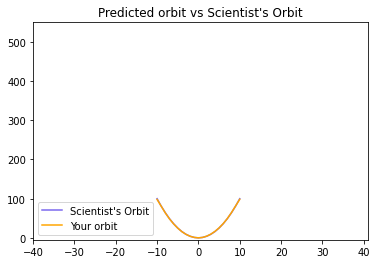

In [20]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit
plot_orbit(twenty_min_orbit)

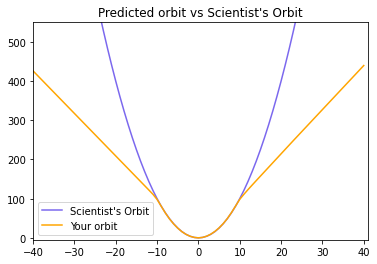

In [21]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)